In [135]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# This ensures plots are displayed inline 
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#*Explore the Data*



In [136]:
advert = pd.read_csv('/content/‏‏advertising.csv')
advert

,TV,Google,Facebook,Sales
0,230.1,37.8,69.2,22100
1,44.5,39.3,45.1,10400
2,17.2,45.9,69.3,12000
3,151.5,41.3,58.5,16500
4,180.8,10.8,58.4,17900
...,...,...,...,...
195,38.2,3.7,13.8,7600
196,94.2,4.9,8.1,14000
197,177.0,9.3,6.4,14800
198,283.6,42.0,66.2,25500


**cleaning** **data**

Treating Missing Data

In [137]:
# printing the summary of the dataframe
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   Google    200 non-null    float64
 2   Facebook  200 non-null    float64
 3   Sales     200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [138]:
# finding the count of missing values from different columns
advert.isnull().sum()

TV          0
Google      0
Facebook    0
Sales       0
dtype: int64

Data Analysis

In [139]:
advert.describe()

,TV,Google,Facebook,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15130.500000
std,85.854236,14.846809,21.778621,5283.892253
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,11000.000000
50%,149.750000,22.900000,25.750000,16000.000000
75%,218.825000,36.525000,45.100000,19050.000000
max,296.400000,49.600000,114.000000,27000.000000


#Exploratory Data Analysis

distribution of the data in our columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


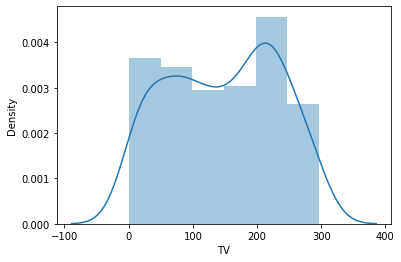

In [140]:
#TV distrbution
plt.figure()
sns.distplot(advert['TV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


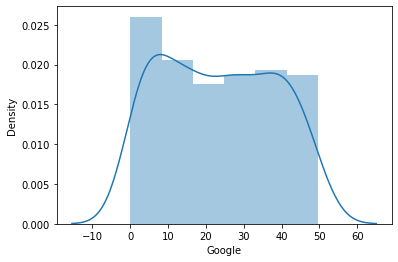

In [141]:
#google distrbution
plt.figure()
sns.distplot(advert['Google'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


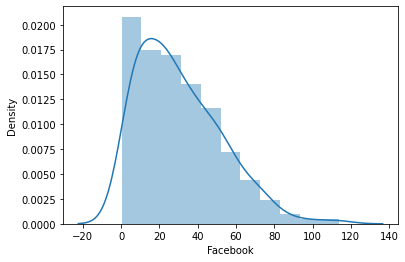

In [142]:
#Facebook distrbution
plt.figure()
sns.distplot(advert['Facebook'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


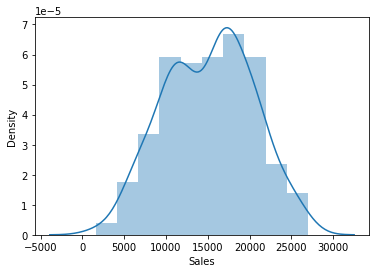

In [143]:
#sales distrbution
plt.figure()
sns.distplot(advert['Sales'])

#relationships between the features and the sales

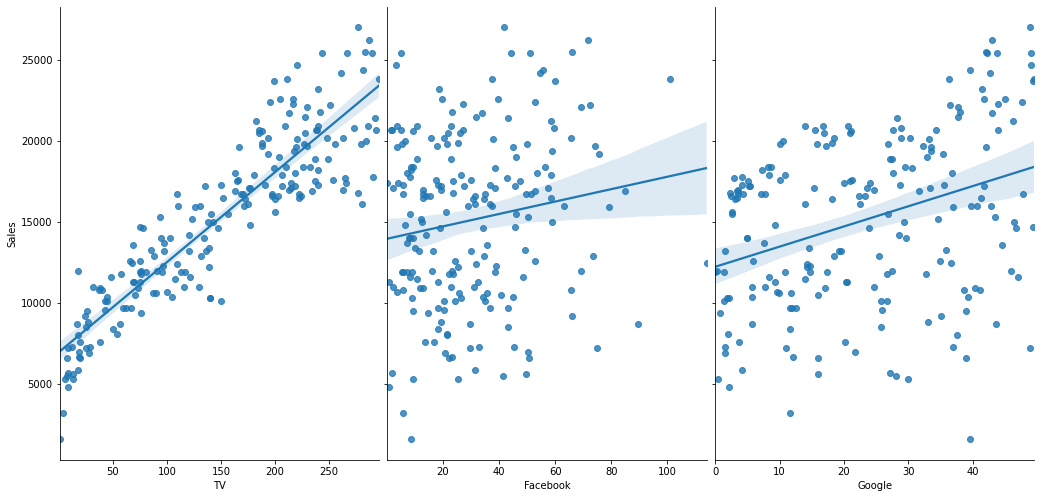

In [144]:
sns.pairplot(advert, x_vars=['TV', 'Facebook', 'Google'], y_vars='Sales', height=7, 
            aspect=0.7, kind='reg')

In [145]:
# Correlation value between TV and Sales
advert.TV.corr(advert.Sales)

0.9012079133023313

In [146]:
# Correlation value between Facebook and Sales
advert.Facebook.corr(advert.Sales)

0.15796002615492624

In [147]:

# Correlation value between Googl and Sales
advert.Google.corr(advert.Sales)

0.3496310970076691

In [148]:
advert.corr()

,TV,Google,Facebook,Sales
TV,1.000000,0.054809,0.056648,0.901208
Google,0.054809,1.000000,0.354104,0.349631
Facebook,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


#Train a Regression Model

Splitting X and Y and splitting training,testing sets

In [149]:
X=advert.iloc[:,:-1].values
Y=advert.iloc[:,-1].values


In [150]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 160 rows
Test Set: 40 rows


**Scaling Features**

In [151]:
# Normalize the data using sklearn StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Machine learning Model training

XGBoost Regressor

In [168]:
# Fit a XGBRegressor model on the training set
model1=XGBRegressor()
model1.fit(X_train,Y_train)

[20:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [153]:
predictions_model1 = model1.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions_model1))
print('Actual labels   : ' ,Y_test)

Predicted labels:  [22068. 19873. 15336. 12949. 17925. 18773. 25322. 16579. 15825. 19158.
 20612. 19831.  5831. 16975. 12243. 20029. 13413.  7373. 18551. 19303.
 18817. 18980.  7229. 11682. 17080. 18598.  8522. 15166. 19121. 22670.
 11942. 23364. 22980. 11465.  9527. 12122. 18825. 17022. 22566. 18776.]
Actual labels   :  [22600 20200 16700 12600 16600 17800 25400 17500 15000 18900 21400 20700
  6600 17200 13700 17400 14200  7600 20900 20500 19700 19800  5900 12400
 16500 20200  7600 17200 20700 20700 10600 22400 22200 10400 12600 10600
 18400 17200 23800 18200]


In [154]:
#prediction on testing data
prediction_model1=model1.predict(X_test)
#R squared value
r2_test=metrics.r2_score(Y_test,prediction_model1)
print('R2 score using XGBRegressor = ',r2_score(Y_test,predictions_model1), '/ 1.0')
mse = mean_squared_error(Y_test, prediction_model1)
print('MSE score using XGBRegressor= ',mean_squared_error(Y_test, predictions_model1), '/ 0.0')

R2 score using XGBRegressor =  0.93514408415113 / 1.0
MSE score using XGBRegressor=  1541156.535735631 / 0.0


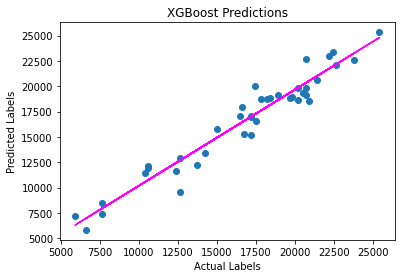

In [155]:
plt.scatter(Y_test, predictions_model1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('XGBoost Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions_model1, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

In [156]:
cv_results_model1 =  XGBRegressor()
scores = cross_val_score(estimator =cv_results_model1, X = X_train, y= Y_train, cv = 5)
print(f'The average accuracy of XGBRegressor Regressor is {round(100*scores.mean(),1)}% with a standard variation of {round(100*scores.std(),2)}%')

[20:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The average accuracy of XGBRegressor Regressor is 93.5% with a standard variation of 2.29%


Random Forest Regressor

In [158]:
# Train the model
model2 = RandomForestRegressor()
model2.fit(X_train, Y_train)


# Evaluate the model using the test data
predictions_model2 = model2.predict(X_test)
mse = mean_squared_error(Y_test, predictions_model2)
print('MSE score using RandomForestRegressor = ',mean_squared_error(Y_test, predictions_model2), '/ 0.0')
r2 = r2_score(Y_test, predictions_model2)
print('R2 score using RandomForestRegressor = ',r2_score(Y_test,predictions_model2), '/ 1.0')



MSE score using RandomForestRegressor =  1172530.575 / 0.0
R2 score using RandomForestRegressor =  0.950656833008771 / 1.0


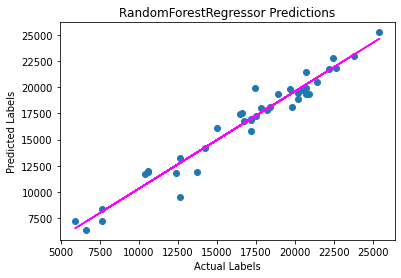

In [159]:
# Plot predicted vs actual
plt.scatter(Y_test, predictions_model2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('RandomForestRegressor Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions_model2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

In [160]:
cv_results_model2 =  RandomForestRegressor()
scores = cross_val_score(estimator =cv_results_model2, X = X_train, y= Y_train, cv = 5)
print(f'The average accuracy of Random Forest Regressor is {round(100*scores.mean(),1)}% with a standard variation of {round(100*scores.std(),2)}%')

The average accuracy of Random Forest Regressor is 93.3% with a standard variation of 2.62%


Gradient Boosting estimator

In [161]:


# Fit a lasso model on the training set
model3 = GradientBoostingRegressor()
model3.fit(X_train, Y_train)

# Evaluate the model using the test data
predictions_model3 = model3.predict(X_test)
mse = mean_squared_error(Y_test, predictions_model3)
print('MSE score using GradientBoostingRegressor = ',mean_squared_error(Y_test, predictions_model3), '/ 0.0')
r2 = r2_score(Y_test, predictions_model3)
print('R2 score using GradientBoostingRegressor = ',r2_score(Y_test,predictions_model3), '/ 1.0')



MSE score using GradientBoostingRegressor =  1372365.0402018845 / 0.0
R2 score using GradientBoostingRegressor =  0.9422472737211085 / 1.0


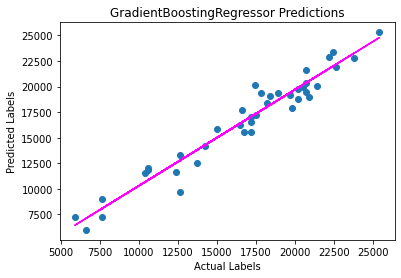

In [162]:
# Plot predicted vs actual
plt.scatter(Y_test, predictions_model3)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('GradientBoostingRegressor Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions_model3, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

In [163]:
#Using cross validation of score 5
cv_results_model3 = GradientBoostingRegressor()
scores = cross_val_score(estimator =cv_results_model3, X = X_train, y= Y_train, cv = 5)
print(f'The average accuracy of GradientBoostingRegressor is {round(100*scores.mean(),1)}% with a standard variation of {round(100*scores.std(),2)}%')

The average accuracy of GradientBoostingRegressor is 93.5% with a standard variation of 2.12%


LinearRegression

In [164]:
# Creating the model

model4 =LinearRegression()
model4.fit(X_train,Y_train)

# Evaluate the model using the test data
predictions_model4 = model4.predict(X_test)

mse = mean_squared_error(Y_test, predictions_model4)
print('MSE score using LinearRegression = ',mean_squared_error(Y_test, predictions_model4), '/ 0.0')
r2 = r2_score(Y_test, predictions_model4)
print('R2 score using LinearRegression = ',r2_score(Y_test,predictions_model4), '/ 1.0')


MSE score using LinearRegression =  3207806.1567181665 / 0.0
R2 score using LinearRegression =  0.8650070895878883 / 1.0


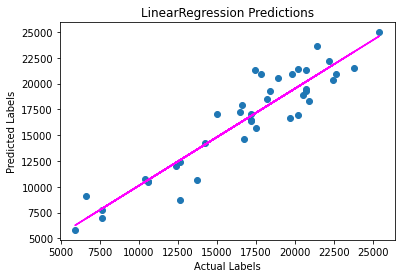

In [165]:
# Plot predicted vs actual
plt.scatter(Y_test, predictions_model4)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('LinearRegression Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions_model4, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()


In [166]:
#Using cross validation of score 5
cv_results_model4 =LinearRegression()
scores = cross_val_score(estimator =cv_results_model4, X = X_train, y= Y_train, cv = 5)
print(f'The average accuracy of LinearRegression is {round(100*scores.mean(),1)}% with a standard variation of {round(100*scores.std(),2)}%')

The average accuracy of LinearRegression is 89.9% with a standard variation of 3.7%
